<a href="https://colab.research.google.com/github/Pambao/MIP/blob/main/Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1:
Develop an algorithm that constructs a binary image (32 x 32 pixels) in which
pixels are "on" if they belong to the locus of points a distance d from an arbitrary
pixel (io,jo) the coordinates of which are requested as input. Clearly, a closed
contour will result. For each of the three distance metrics discussed (Euclidean,
"city block," and "chessboard"), construct such a binary image that contains such
equidistance contours for a range of distances, d. Discuss the appearance of the
equidistance contours that result from the three metrics over the range of distances
investigated. If the background is considered in 8-connectivity, which metric(s)
produces equidistance contours that divide the image plane into two noncontiguous regions?

X: 16
Y: 16


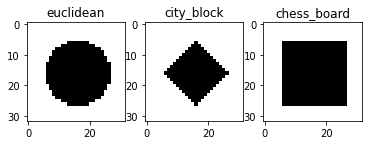

In [8]:
import math
from PIL import Image
import matplotlib.pyplot as plt

size = 32


def euclidean(ori, point):
    return math.sqrt(pow(ori[0] - point[0], 2) + pow(ori[1] - point[1], 2))


def city_block(ori, point):
    return abs(ori[0] - point[0]) + abs(ori[1] - point[1])


def chess_board(ori, point):
    return max(abs(ori[0] - point[0]), abs(ori[1] - point[1]))


def get_size():
    origin = [int(input('X: ')), int(input('Y: '))]
    return origin


def plot(distance, im, origin):
    for x in range(size):
        for y in range(size):
            switch = {
                'euclidean': euclidean(origin, (x, y)),
                'city_block': city_block(origin, (x, y)),
                'chess_board': chess_board(origin, (x, y))
            }
            length = switch.get(distance)
            if length <= size / 3:
                im.putpixel((x, y), 0)


def solution1_1():
    origin = get_size()
    plot_pos = 1
    dist_modes = ('euclidean', 'city_block', 'chess_board')
    for dist in dist_modes:
        im = Image.new(mode='1', size=(size, size), color=1)
        plot(dist, im, origin)
        plt.subplot(1, 3, plot_pos)
        plt.title(dist)
        plot_pos += 1
        plt.imshow(im)
    plt.show()


if __name__ == "__main__":
  solution1_1()

The appearance for each image that the pixel is "on" if they belong to the locus of point
of a distance d using the following metrics "Euclidean", "city block", and 'chessboard' is respectively
circle, rhombus, and rectangle.

If the background is considered in 8-connectivity, all the metrics produces equidistance contours that divide
the image plane into two non-contiguous region.

## Question 2:
For each of the three distance metrics, construct an image in which the value of
pixel (i,j) is proportional to the corresponding distance from an arbitrary pixel
(io,jo) the coordinates of which are requested as input. For the image constructed
using Euclidean distance, define a region R such that all pixels (i,j)  R satisfy the
distance condition D[(i,j),(io,jo)]<do, where do is some reasonable distance.
Produce the run-length code for region R (considered as a binary image).

X: 16
Y: 16


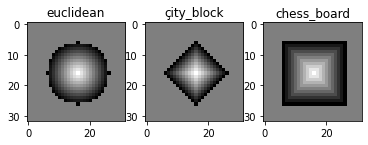

Run length code is: 
[(6, 16, 16), (7, 12, 20), (8, 10, 22), (9, 9, 23), (10, 8, 24), (11, 8, 24), (12, 7, 25), (13, 7, 25), (14, 7, 25), (15, 7, 25), (16, 6, 26), (17, 7, 25), (18, 7, 25), (19, 7, 25), (20, 7, 25), (21, 8, 24), (22, 8, 24), (23, 9, 23), (24, 10, 22), (25, 12, 20), (26, 16, 16)]


In [9]:
def solution1_2():
    ori = get_size()
    d = int(size / 3)
    modes = ('euclidean', 'çity_block', 'chess_board')
    plot_pos = 1
    for mode in modes:
        im = Image.new(mode='L', size=(size, size), color=int(255 / 2))
        for x in range(size):
            for y in range(size):
                switch = {
                    'euclidean': euclidean(ori, (x, y)),
                    'çity_block': city_block(ori, (x, y)),
                    'chess_board': chess_board(ori, (x, y))
                }
                length = switch.get(mode)
                if length <= d:
                    val = int((1 - length / d) * 255)
                    im.putpixel((x, y), val)
        
        plt.subplot(1,3, plot_pos)
        plt.imshow(im, cmap='gray', vmin = 0, vmax = 255)
        plt.title(mode)
        plot_pos += 1
    plt.show()

    # run length code

    y_lower = int(ori[1] - d)
    y_upper = int(ori[1] + d)
    x_lower = int(ori[0] - d)
    x_upper = int(ori[0] + d)
    run_length_code = []
    y = y_lower
    while y_lower <= y <= y_upper and size >= y >= 0:
        x = x_lower
        while x_lower <= x <= x_upper and size >= x >= 0:
            length = euclidean(ori, (x, y))
            if length <= d:
                x_left = x
                while length <= d:
                    x += 1
                    length = euclidean(ori, (x, y))
                run_length_code.append((y, x_left, x - 1))
            else:
                x += 1
        y += 1
    print(f'Run length code is: \n{run_length_code}')

if __name__ == '__main__':
  solution1_2()

# Question 3 :
Develop an algorithm that uses the run-length code from Problem 2 to create a
binary image in which pixels in region R are "on" and other pixels are "off."
Subsample this 32 x 32-pixel image to create an 8 x 8-pixel binary image, and
develop an algorithm that derives the quadtree representation of this binary image.

```Composite``` class is used for construct the quadtree that implement the composite design pattern ```Branch``` and ```Leaf``` class is respectedly inner node and leaf node. Inner node itself contains 4 other ```Composite``` inside.


In [12]:
class Composite:
    def __init__(self):
        self.children = []

    def display(self):
        raise NotImplementedError


class Branch(Composite):
    def add_child(self, child):
        self.children.append(child)

    def display(self):
        print('g(', end='')
        for child in self.children:
            child.display()
            if child is not self.children[-1]:
                print(' ', end='')
        print(')', end='')


class Leaf(Composite):
    def __init__(self, val):
        self.val = val

    def display(self):
        dict = {1: 'w', 0: 'b', -1: 'm'}
        print(dict.get(self.val), end='')

Run length code:
 [(6, 16, 16), (7, 12, 20), (8, 10, 22), (9, 9, 23), (10, 8, 24), (11, 8, 24), (12, 7, 25), (13, 7, 25), (14, 7, 25), (15, 7, 25), (16, 6, 26), (17, 7, 25), (18, 7, 25), (19, 7, 25), (20, 7, 25), (21, 8, 24), (22, 8, 24), (23, 9, 23), (24, 10, 22), (25, 12, 20), (26, 16, 16)]


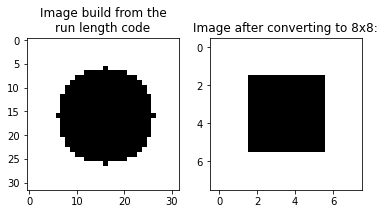

Code for the quadtree:
g(g(w w w b) g(w w b w) g(w b w w) g(b w w w))

In [21]:
def is_leaf(image):
    val = image.getpixel((0, 0))
    image_size = image.size
    for x in range(0, image_size[0]):
        for y in range(0, image_size[1]):
            if val != image.getpixel((x, y)):
                return [-1, False]

    return [val, True]


def construct_quadtree(parent, image):
    images = []
    image_size = image.size[0]
    for y in (0, image_size / 2):
        for x in (0, image_size / 2):
            left = x
            right = x + image_size / 2
            top = y
            bot = y + image_size / 2
            sub_image = image.crop((left, top, right, bot))
            images.append(sub_image)
    for sub_image in images:
        node_of_sub_image = is_leaf(sub_image)
        if node_of_sub_image[1]:
            leaf = Leaf(node_of_sub_image[0])
            parent.add_child(leaf)
        else:
            branch = Branch()
            construct_quadtree(branch, sub_image)
            parent.add_child(branch)


def solution1_3():
    size = 32
    ori = (16, 16)
    d = int(size / 3)

# The following code is used to generate the run length code from the Eculidean
# distance image.

    y_lower = int(ori[1] - d)
    y_upper = int(ori[1] + d)
    x_lower = int(ori[0] - d)
    x_upper = int(ori[0] + d)
    run_length_code = []
    y = y_lower
    while y_lower <= y <= y_upper and size >= y >= 0:
        x = x_lower
        while x_lower <= x <= x_upper and size >= x >= 0:
            length = euclidean(ori, (x, y))
            if length <= d:
                x_left = x
                while length <= d:
                    x += 1
                    length = euclidean(ori, (x, y))
                run_length_code.append((y, x_left, x - 1))
            else:
                x += 1
        y += 1
    print(f"Run length code:\n {run_length_code}")

# The following code is used to build image from the above run length code
    
    im = Image.new('1', size=(size, size), color=1)
    for code in run_length_code:
        y = code[0]
        for x in range(code[1], code[2] + 1):
            im.putpixel((x, y), 0)

    plt.subplot(1,2,1)
    plt.imshow(im)
    plt.title('Image build from the\nrun length code')

    resized_image = im.resize((8,8))
    plt.subplot(1,2,2)
    plt.imshow(resized_image)
    plt.title('Image after converting to 8x8:')
    plt.show()

# The following code is the code used to construct the qua
    
    root = Branch()
    construct_quadtree(root, resized_image)
    print(f"Code for the quadtree:")
    root.display()

solution1_3()

## Question 4:
Write a program that outputs the base-2 representation of any non-negative base-
10 integer provided as input.

In [34]:
base_10 = int(input("Enter a base 10 number: "))
base_2 = []
while base_10 != 0:
  base_2.append(base_10 % 2)
  base_10 = base_10 // 2
base_2.reverse()
print(base_2)

Enter a base 10 number: 5
[1, 0, 1]
